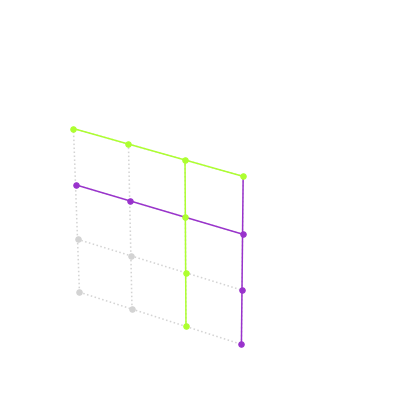

In [237]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
from matplotlib.ticker import MaxNLocator

ss = 7

fig = plt.figure(figsize=(ss,ss))
ax = fig.gca(projection='3d')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_aspect("equal")
ax.set_axis_off()

points = []
grid = []
colors = []
N = 4
for i in range(1,N+1):
    grid.append([])
    colors.append([])
    for j in range(1,N+1):
        grid[i-1].append([])
        colors[i-1].append([])
        for k in range(1,N+1):
            point = np.array([i,j,k])
            points.append(point)
            grid[i-1][j-1].append(point)
            colors[i-1][j-1].append("lightgrey")

# p = len(points)
# for i in range(0,p-1):
#     pi = points[i]
#     for j in range(i+1,p):
#         pj = points[j]
#         dist = np.linalg.norm(pj-pi)
#         if np.isclose(dist, 1):
#             ax.plot3D((pi[0], pj[0]), (pi[1], pj[1]), (pi[2], pj[2]), color="lightgrey", linestyle=":")

def connect(points, color="lightgrey", linestyle=":", render_all=True):
    p = len(points)
    for i in range(0,p-1):
        pi = points[i]
        for j in range(i+1,p):
            pj = points[j]
            dist = np.linalg.norm(pj-pi)
            if np.isclose(dist, 1):
                if render_all or (pi[1] == 1 and pj[1] == 1):
                    ax.plot3D((pi[0], pj[0]), (pi[1], pj[1]), (pi[2], pj[2]), color=color, linestyle=linestyle)

def select(x, y, z, grid, colors, color="goldenrod", linestyle="-", render_all=True):
    i = x-1
    j = y-1
    k = z-1
    pts = [grid[i][j][k]]
    colors[i][j][k] = color
    for idx in range(N):
        if idx != i:
            pts.append(grid[idx][j][k])
            colors[idx][j][k] = color
        if idx != j:
            pts.append(grid[i][idx][k])
            colors[i][idx][k] = color
        if idx != k:
            pts.append(grid[i][j][idx])
            colors[i][j][idx] = color
    connect(pts, color, linestyle, render_all)

def colorize(grid, colors, show_text=True, render_all=True):
    for i in range(0,N):
        for j in range(0,N):
            for k in range(0,N):
                p = grid[i][j][k]
                color = colors[i][j][k]
                if render_all or p[1] == 1:
                    ax.scatter3D([p[0]], [p[1]], [p[2]], color=color, s=30)
                    if show_text:
                        dx = -0.28
                        dy = -0.2
                        if p[0] > 1:
                            dx = 0.1
                            dy = 0
                        ax.text(p[0]+dx*scale, p[1]+dy*scale, p[2], "%d-%d-%d" % (p[0],p[2],p[1]), None, fontweight='bold', color=color)

                        
ax.scatter3D([N], [N], [N], color="white", s=1)

def do_plane():
    connect(points,render_all=False)
    select(4,1,3,grid,colors,render_all=False,color="darkorchid")
    select(3,1,4,grid,colors,render_all=False,color="greenyellow")
    # select(2,1,2,grid,colors)
    # select(1,2,2,grid,colors)
    # select(2,2,1,grid,colors)
    # select(3,3,3,grid,colors,color="darkorchid")
    # select(4,3,4,grid,colors,color="darkorchid")
    # select(3,4,4,grid,colors,color="darkorchid")
    # select(4,4,3,grid,colors,color="darkorchid")
    colorize(grid,colors,False,False)

def do_cube():
    connect(points,render_all=True)
    select(1,1,1,grid,colors,)
    select(1,1,2,grid,colors,color="black")
    select(2,2,2,grid,colors,color="blue")
    select(3,3,3,grid,colors,color="green")
    select(4,4,4,grid,colors,color="red")
    colorize(grid,colors,False)

# do_cube()
do_plane()
        
plt.show()